This docuemnt demonstrates how the composite pal signal can be modultated into a VHF signal which a TV tuner can decode.


First lets create a pal signal:


2830464


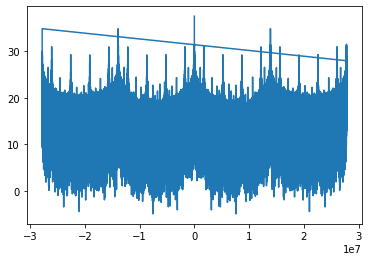

In [7]:

import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("/home/aes/Kode/hdlmake/sim/vicii/composite.txt",comments="x") 

ps = np.abs(np.fft.fft(data))**2
print(data.size)

time_step = 18e-9
freqs = np.fft.fftfreq(data.size, time_step)

#idx = (freqs > 70e6) & (freqs < 80e6)
#plt.plot(freqs[idx], np.log(ps[idx]))
plt.plot(freqs, np.log(ps))



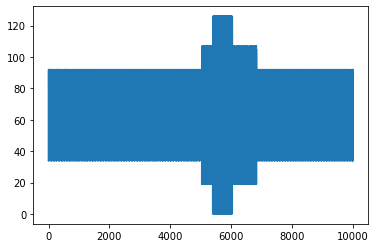

In [8]:
plt.plot(data[1000000:1010000])

SSB modulation, using eliptical filter

[ 1.         -2.8756802   2.76003001 -0.88404895]
[ 0.00284392 -0.00269349 -0.00269349  0.00284392]
[ 16384 -47115  45220 -14484]
[ 46 -44 -44  46]


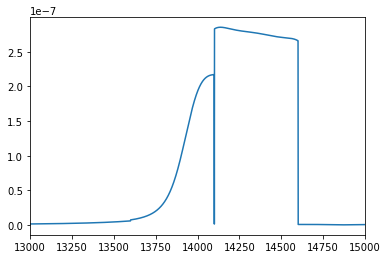

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
from scipy.signal import ellip
from scipy.signal import filtfilt
from scipy.signal import lfilter

N= 40000
t = np.linspace(1,N,N)

s = np.zeros(N)

BW = 500
for i in range(BW):
    w = 2*np.pi*(i+1.0)/N
    s = s + np.sin(w*t)
s = s / BW

# Shift to 0 Freq
w = 2*np.pi*BW/2.0/N
if_lo_i = np.sin(w*t) * s
if_lo_q = np.cos(w*t) * s

# lowpass filter
b,a = ellip(3, 0.01, 40,BW/float(N))
if_lo_i = filtfilt(b,a,if_lo_i)
if_lo_q = filtfilt(b,a,if_lo_q)

# up convert
w = 2*np.pi*(14100+BW/2)/N
s_if_i = np.sin(w*t)*if_lo_i
s_if_q = np.cos(w*t)*if_lo_q


mm = s_if_i + s_if_q
pmm = np.abs(np.fft.fft(mm)/N)**2


plt.plot(pmm)
plt.xlim((13000,15000) )
print(a)
print(b)
print ((a*(1<<14)).astype(int))
print ((b*(1<<14)).astype(int))

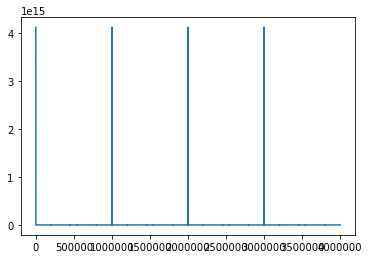

In [1]:
import numpy as np
import matplotlib.pyplot as plt

d = np.fromfile("/home/aes/Kode/hdlmake/sim/rf_modulator/rf.dat",dtype=np.uint8)
N = len(d)

pwr = pmm = np.abs(np.fft.fft(d)**2)

plt.plot(pwr[0:N])

In [13]:

print( np.arange(16))
a = np.sin( 2.0/16.0*np.pi*np.arange(16) )*7.5+8
v = ( a.astype(int) )

for i in range(16):
    print (i,": rf_audio<= ", v[i],";") 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
0 : rf_audio<=  8 ;
1 : rf_audio<=  10 ;
2 : rf_audio<=  13 ;
3 : rf_audio<=  14 ;
4 : rf_audio<=  15 ;
5 : rf_audio<=  14 ;
6 : rf_audio<=  13 ;
7 : rf_audio<=  10 ;
8 : rf_audio<=  8 ;
9 : rf_audio<=  5 ;
10 : rf_audio<=  2 ;
11 : rf_audio<=  1 ;
12 : rf_audio<=  0 ;
13 : rf_audio<=  1 ;
14 : rf_audio<=  2 ;
15 : rf_audio<=  5 ;
